<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Magnetotellurics" data-toc-modified-id="Magnetotellurics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Magnetotellurics</a></span><ul class="toc-item"><li><span><a href="#References" data-toc-modified-id="References-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Maxwell's-Equations-in-2D" data-toc-modified-id="Maxwell's-Equations-in-2D-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Maxwell's Equations in 2D</a></span></li><li><span><a href="#Impedance" data-toc-modified-id="Impedance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Impedance</a></span></li><li><span><a href="#TM-mode-in-esys-escript" data-toc-modified-id="TM-mode-in-esys-escript-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>TM-mode in <code>esys-escript</code></a></span></li><li><span><a href="#Example-Problem" data-toc-modified-id="Example-Problem-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Example Problem</a></span></li><li><span><a href="#PDE-Solution" data-toc-modified-id="PDE-Solution-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>PDE Solution</a></span></li><li><span><a href="#Impedance" data-toc-modified-id="Impedance-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Impedance</a></span></li><li><span><a href="#Transect" data-toc-modified-id="Transect-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Transect</a></span></li><li><span><a href="#More-Work:" data-toc-modified-id="More-Work:-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>More Work:</a></span></li></ul></li></ul></div>

by Lutz Gross, The University of Queensland, Australia
<a href="mailto:l.gross@uq.edu.au">l.gross@uq.edu.au</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

# Magnetotellurics

In this section we discuss how to solve the PDE for 2D magnetotellurics (MT) due to a variation of
the electric conductivity $\sigma$ in the subsurface using `esys.escript`. It is assumed that you have 
worked through the [introduction section on `esys.escript`](escriptBasics.ipynb). 
First we will provide the basic theory:

## References


- [Chave, A. D., & Jones, A. G. (Eds.) (2012). The magnetotelluric method: Theory and practice. New York: Cambridge University Press. ](https://doi.org/10.1017/CBO9781139020138)
- [R. Schaa, L. Gross, J. du Plessis: “PDE-based geophysical modelling using Finite Elements: examples from 3-D resistivity and 2-D magnetotellurics”, 2016, Journal of Geophysics and Engineering, 13, S59-73](https://doi.org/10.1088/1742-2132/13/2/S59)
- [Niwas, S., Gupta, P.K. & Gaur, V.K. J Earth Syst Sci (2005) 114: 523. https://doi.org/10.1007/BF02702028](https://doi.org/10.1007/BF02702028)


## Maxwell's Equations in 2D

In this prac we are investigating the magnetotellurics (MT) method. The MT
is targeting to recover the distribution of the electric conductivity $\sigma$ (in [S/m]) in the subsurface.
It is an electro-magnetic method (EM) using natural sources of electro-magnetic fields a very low 
frequency which allows to target very deep targets ($>50km$) but at low resolution. 
Here we will focus on the case of $H$−polarisation (also known as TM mode). 
In this case it is assumed that the incoming magnetic field is polarized in direction $x$ perpendicular to the 
$yz$ plane of investigation. There is also the case of $E$ polarization (also known as TE mode) 
where the electric field polarized in the direction $x$.   

For the TM mode the modeling equations are given as the a 2D simplification of the Maxwell's equations.
For the given transversal magnetic field $H_x$ the vertical and 
horizontal components $E_z$ and $E_y$ of the electric field are given as 
\begin{equation}\label{eqTMEz}
E_z= - \rho \frac{\partial H_x}{\partial y }
\end{equation} 
\begin{equation}\label{eqTMEy}
E_y = \rho \frac{\partial H_x}{\partial z }
\end{equation} 
with resistivity $\rho = \frac{1}{\sigma}$.
The horizontal components then need to fulfill the equation:
\begin{equation}\label{eqMaxwell}
\frac{\partial E_z}{\partial y }  - \frac{\partial E_y}{ \partial z } = - \mathbf{j} \omega \mu_0 H_x
\end{equation}
where $\mathbf{j}$ is the complex unity, $\omega$ is the angular frequency ([Hz]) 
and $\mu_0= 4 \pi \cdot 10^{-7} \frac{N}{A^2}$ is the magnetic constant.
Inserting \eqref{eqTMEz} and \eqref{eqTMEy} into \eqref{eqMaxwell} is resulting in
\begin{equation}\label{eqMaxwella}
- \frac{\partial }{\partial y } \rho \frac{\partial H_x}{\partial y }  
- \frac{\partial }{\partial z } \rho \frac{\partial H_x}{\partial z } 
+ \mathbf{j} \omega \mu_0 H_x = 0
\end{equation}
which is second order PDE. 


## Impedance

Field observations will deliver impedance as function of 
angular frequency $\omega$. In the TM mode the impedance is given as 
\begin{equation}\label{eqImp}
Z_{yx}(\omega)=\frac{E_y}{H_x}
\end{equation}
This is a complex number. For interpretation an alternative representation
based on apparent resistivity $\rho_a$ and phase $\phi$ is commonly used. 
These quantities are derived from the impedance $Z_{yx}$ as
\begin{equation}\label{eqRhoa}
\rho_a(\omega) =\frac{1}{\omega \mu_0} |Z_{yx}(\omega)|^2
\end{equation}
and 
\begin{equation}\label{eqPhase}
\phi(\omega)= \arctan( \frac{Z_{yx}(\omega).imag}{Z_{yx}(\omega).real})
\end{equation}
For constant conductivity $\sigma$. 
the apparent resistivity and the phase are frequency independent 
and calculate as 
\begin{equation}\label{eqRhoaHH}
\rho_a(\omega) =\frac{1}{\sigma}
\end{equation}
and 
\begin{equation}\label{eqPhaseHH}
\phi(\omega)= 45^o
\end{equation}

##  TM-mode in `esys-escript`

Now we need to define the PDE using the  `LinearSinglePDE` PDE template PDE. We work in the $x_0=y$
and $x_1=z$ coordinate system. 

Here we restate the template: When $u$ is the unknown
we define the pseudo-flux vector $\mathbf{F}$ which is in essence the negative gradient of the solution 
times some matrix $\mathbf{A}$:
\begin{equation} \label{EQESYSFLUX}
\mathbf{F} = - \mathbf{A} \mathbf{\nabla} u + \mathbf{X}
\end{equation} 
with matrix $\mathbf{A}$ and vector  $\mathbf{X}$.
The pseudo-flux vector $\mathbf{F}$ needs to fulfill the conservation equation : 
\begin{equation}\label{EQESYSCONSERVATION}
\mathbf{\nabla}^t \; \mathbf{F} + D \; u = Y 
\end{equation}
where $D$ is a scalar and $Y$ is the right hand side. 



The Maxwell equation \eqref{eqMaxwell} in the $x_0,x_1$-coordinates reads as
\begin{equation}\label{eqMaxwell2}
\frac{\partial E_z}{\partial x_0}  - \frac{\partial E_y}{ \partial x_1 } + \mathbf{j} \omega \mu_0 H_x =0
\end{equation}
from which we can identify the $D=\mathbf{j} \omega \mu_0$, $Y=0$
and the pseudo-flux
\begin{equation}\label{EQFLUX1}
\mathbf{F} = 
\begin{bmatrix}
 F_0 \\
 F_1
\end{bmatrix}
= \begin{bmatrix}
 E_z \\
 -E_y
\end{bmatrix}
\end{equation}
The unknown of the problem becomes $u=H_x$ and 
using \eqref{eqTMEz} and \eqref{eqTMEy}
hence the flux is given as 
\begin{equation}\label{EQFLUX2}
\mathbf{F} = 
\begin{bmatrix}
 - \rho \frac{\partial H_x}{\partial x_0 } \\
 - \rho \frac{\partial H_x}{\partial x_1 } 
\end{bmatrix}
= - 
\begin{bmatrix}
\rho \frac{d u}{d x_0} & + & 0 \frac{d u}{d x_1}\\
0 \frac{d u}{d x_0} & + & \rho \frac{d u}{d x_1}
\end{bmatrix}
=- \mathbf{A} \nabla u
\end{equation} 
This gives the matrix $\mathbf{A}$
\begin{equation}
\begin{bmatrix}
A_{00} & A_{01} \\
A_{10}  & A_{11} 
\end{bmatrix} 
= 
\begin{bmatrix}
\rho & 0  \\
0  & \rho 
\end{bmatrix}
\end{equation}
and  $\mathbf{X}=0$.

## Example Problem 

We consider a step of a conductive anomaly ($\rho_a=0.5$) within a resistive media ($rho_b=100.$)
and want to calculate the distribution of the impedance $Z_{yx}$ along/near the surface. 
The anomaly is located at a depth of $D$ below the surface and has a width $W$. The vertical extend of the anomaly is given as $H$.
The domain has horizontal extend of $L0=40km$ and depth of $L1=80km$ subdived into $NE0 \times NE1$ 
elements. We want to plot the profile of the apparent resistivity and the phase for frequencies $f=1 Hz$.

 <img src="./Data/MTImage1.png" alt="MT domain" width="500"> 

In [1]:
L0=80000   # horizontal extend [m]
L1=40000   # depth [m] 
NE0=800    # number of element in horizontal direction
NE1=400    # number of element in vertical direction

rho_b=100  # background resistivity [Ohm m]
rho_a=0.5  # resistivity in the anomaly [Ohm m]
D=250.     # depth of the top edge of the anomaly [m]
W=1000.    # width of the anomaly [m]
H=2000.    # vertical extend of the anomaly [m]
OFFSET=1000 # offset of the central vertical axis of the anomaly from the domain (<0 move to the left, 0> move to the right) 

import numpy as np
Mu0=4*np.pi*1e-7



In [2]:
h0, h1=L0/NE0, L1/NE1
h0, h1

(100.0, 100.0)

First step is to set up the domain:

In [3]:
from esys.escript import *
from esys.finley import Rectangle

domain=Rectangle(n0=NE0, n1=NE1, l0=L0, l1=L1)

## PDE Solution

Then we initiate the PDE we need to solve for $u=H_x$. We need to tell the `LinearSinglePDE` that the 
PDE has coefficients with complex values:

In [4]:
from esys.escript.linearPDEs import LinearSinglePDE
pde=LinearSinglePDE(domain, isComplex=True)

In general `esys.escript` tries to use iterative solvers for the discrete version of the PDE as this
less memory demanding and in many cases very fast.
In this particular application case we want make sure that a direct solver is used as due to the complex $D$ the
PDE is not necessarily suitable for an iterative solver:  

In [5]:
from esys.escript.linearPDEs import SolverOptions
pde.getSolverOptions().setSolverMethod(SolverOptions.DIRECT)

The PDE coefficient `D` is obvious from \eqref{eqMaxwell2}. We pick a frequency of $f=1Hz$.

In [6]:
f=1.0# Hz
pde.setValue(D=1j*2*np.pi*f*Mu0)

Setting the conductivity distribution needs a bit of thinking. We introduce four masks (with values values `0` and `1`) which are then combined the to define the region of the anomaly (we assume that :

- `m1` = has values `1` for elements below the top edge of the anomaly: $x_1 \le L1-D$
- `m2` = has values `1` for elements above the bottom edge of the anomaly: $x_1 \ge L1-D-H$
- `m3` = has values `1` for elements to the right of left edge of the anomaly: $x_0 \ge L0/2+OFFSET-W/2$
- `m4` = has values `1` for elements to the left of right edge of the anomaly: $x_0 \le L0/2+OFFSET+W/2$


In [7]:
X=ReducedFunction(domain).getX()
m1=whereNonPositive(X[1]-(L1-D))
m2=whereNonNegative(X[1]-(L1-D-H))
m3=whereNonNegative(X[0]-(L0/2+OFFSET-W/2))
m4=whereNonPositive(X[0]-(L0/2+OFFSET+W/2))

The product `m1*m2*m3*m4` of the four masks has value `1` where all four masks have value `1` and this is hopefully the anomaly:

In [8]:
m=m1*m2*m3*m4

To make sure that the masks are set correctly we make a plot: 

In [9]:
#%matplotlib notebook
import matplotlib.pyplot as plt

As usual we first need to convert the `Data` object `m` into `numpy` array and also need to get the locations where values are hold:

In [10]:
m_np=convertToNumpy(m)
x_np=convertToNumpy(m.getX())

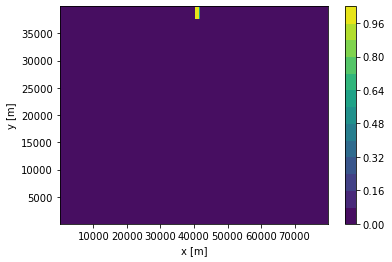

In [11]:
plt.figure()
plt.tricontourf(x_np[0], x_np[1], m_np[0], 15)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.colorbar()

Now we have a mask `m` which is has value `1` for the anomaly and `0`. This allows us to set the 
resistivity `rho`:

In [12]:
rho=rho_b*(1-m)+rho_a*m

Now we are ready to set the `A` coefficient. Keep in mind that the coefficient `A` expects values at numerical integration points so `rho` - with values held at element centers - need to made available at numerical integration points via interpolation to `Function(domain)`.

In [13]:
rho=interpolate(rho, Function(domain))
pde.setValue(A=rho*np.eye(2)) 

The magnetic field is set to one at the top of the domain $x_1=L1$. To do this we need create a mask with values `1` for then FEM nodes located at the top of the domain.

In [14]:
x=domain.getX()
mD=whereZero(x[1]-L1)
pde.setValue(q=mD, r=1)

The argument `r=1` sets the values for the solution to the value `1` where ever `q` has the value `1`. So only the values of `r` are only relevant where Dirichlet-type boundary conditions apply. 

Now we can get the solution $u=H_x$:

In [15]:
Hx=pde.getSolution()

## Impedance

Impedance is obtained from the definition. We look at the values at element centers. 
First we need to get the $y$-component of the electric field which is given as $E_y=\rho \frac{\partial H_x}{\partial x_1}$: 

In [16]:
Ey=rho*grad(Hx, ReducedFunction(domain))[1]

Then the TM impedence $Zyx=\frac{E_y}{H_x}$ is calculated:

In [17]:
Zyx=Ey/Hx

The impedance is a complex number:

In [18]:
Zyx.isComplex()

True

As complex numbers  `Zyx` cannot be plotted as as a contour. A meaningful way to plot `Zyx` is to look at the apparent resistivity $\rho_a =\frac{1}{\omega \mu_0} |Z_{yx}(\omega)|^2$ and the apparent phase:

In [19]:
rho_a=1./(2*np.pi*f*Mu0)*abs(Zyx)**2
phi=phase(Zyx)

Let's plot the distribution of the apparent resistivity `rho_a`:

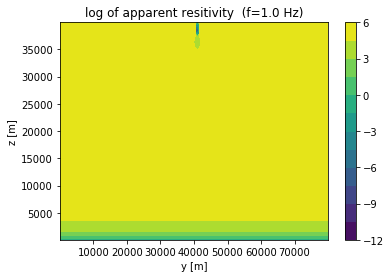

In [20]:
rho_a_np=convertToNumpy(rho_a)
x_np=convertToNumpy(rho_a.getFunctionSpace().getX())

plt.figure()
plt.tricontourf(x_np[0], x_np[1], log(rho_a_np[0]), 15)
plt.xlabel('y [m]')
plt.ylabel('z [m]')
plt.title(f"log of apparent resitivity  (f={f} Hz)")
plt.colorbar()

For convenience we convert the phases from rad to degree before plotting:

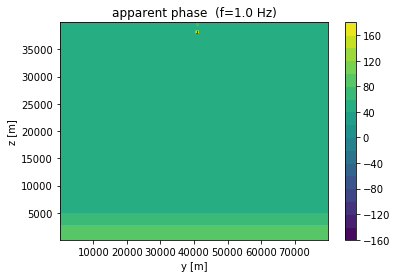

In [21]:
phi_np=np.rad2deg(convertToNumpy(phi))

plt.figure()
plt.tricontourf(x_np[0], x_np[1], phi_np[0], 15)
plt.xlabel('y [m]')
plt.ylabel('z [m]')
plt.title(f"apparent phase  (f={f} Hz)")
plt.colorbar()

## Transect

In the field TM data are collected along transects at the surface. 
Lets plot the apparent resistivity and phase along the surface. 

First the points at/near the surface that define the transect need to be set. We use every second element center for the elements near the surface:

In [22]:
locations_in_transect=[ (h0*k+h0/2. , L1 ) for k in range(0,NE0,2) ]

Then we define a `Locator` to pick values at/near these points:

In [23]:
from esys.escript.pdetools import Locator
locator_transect=Locator(where=ReducedFunction(domain), x=locations_in_transect)

The transect is actually not located at the surface but half and element size below it:

In [24]:
locator_transect.getX()[0], locator_transect.getX()[6]

(array([   50., 39950.]), array([ 1250., 39950.]))

So we get the true horizontal locations along the transect:

In [25]:
transect_x=[ x[0] for x in locator_transect.getX()]

Grab the values for apparent resistivity and phase and then plot

In [26]:
rho_a_x=locator_transect(rho_a)
phi_x=np.rad2deg(locator_transect(phi))

Plot the apparent resistivity along the transect:

Text(0.5, 1.0, 'Resistivity vs offset  (f=1.0 Hz)')

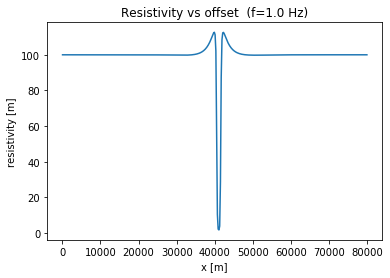

In [27]:
plt.figure()
plt.plot(transect_x,rho_a_x)
plt.xlabel('x [m]')
plt.ylabel('resistivity [m]')
plt.title(f"Resistivity vs offset  (f={f} Hz)")

And the same for the phase:

Text(0.5, 1.0, 'phase vs offset (f=1.0 Hz)')

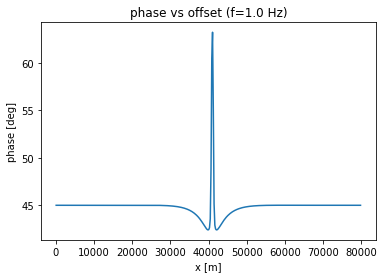

In [28]:
plt.figure()
plt.plot(transect_x,phi_x)
plt.xlabel('x [m]')
plt.ylabel('phase [deg]')
plt.title(f"phase vs offset (f={f} Hz)")

## More Work:

- use the analytic solution for homogeneous half space with constant resistivity $\rho_b$ to set Dirichlet-type boundary conditions for all faces
- implementation of the TE case. This follows the TM implementation but requires to add an air layer where conductivity is zero. 